# Consideraciones

Este notebook tiene como finalidad explicar los pasos necesarios para llegar al objetivo del proyecto:"En particular la idea principal es comparar los árboles obtenidos utilizando las distintas técnicas y con ello poder identificar las diferencias (si existieran) de los árboles filogenéticos creados.", para ello no estamos utilizando un archivo de diferentes levaduras como se plantea en el proyecto el archivo que se utiliza es sólo para mostrar los pasos a seguir y como veríamos los resultados para lograr el objetivo planteado por tanto el archivo yeast.fasta contiene los 18 genes de las siguientes especies:

['A_thaliana_79565543', 'S_cerevisiae_50593115', 'Azoarcus_sp_119896292',
       'P_marinus_124024712', 'P_marinus_123967536', 'P_marinus_123965234',
       'H_halophila_121996810', 'B_bacilliformis_121601635',
       'B_aciditrophicus_85857845', 'S_elongatus_81298811',
       'G_metallireducens_78221228', 'Synechococcus_sp_78211558',
       'P_marinus_72381840', 'S_elongatus_56750010', 'B_henselae_49474831',
       'B_quintana_49473688', 'P_marinus_33860560',
       'Synechocystis_sp_16329170']
       
con estas secuencias generaremos la simulación de los pasos sólo para temas explicativos, cabe destacar que dentro de estas secuencias se encuentra la de nuestro interés que es "S_cerevisiae" entonces podremos mostrar la interacción de esta con  otras especies en la construcción de un árbol filogenético.    

# Especificación del Problema

La levadura de cerveza Saccharomyces cerevisiae (de Saccharo azúcar, myces hongo y cerevisiae cerveza) es
un hongo unicelular, un tipo de levadura utilizado industrialmente en la fabricación de pan, cerveza y vino. Se
desea desarrollar el árbol filogenético de Saccharomyces cerevisiae, con respecto a otras levaduras, dadas sus
secuencias de ADN, utilizando diferentes algoritmos o métodos para su construcción, basados en caractéres
(método de parsimonia), basados en distancias (Neighbor joining, UPGMA, Bayesianos) y máxima verosimilitud
(pipeline:SNPhylo).

Entonces la idea es utilizar un archivo .fasta con las secuencias de distintas levaduras, y hacer el siguiente procedimiento:

In [3]:
from Bio import SeqIO

#se extraen las secuencias del archivo yeast.fasta
sequences=[]#vamos a guardar la lista de secuencias aquí
seqid=[]#vamos a guardar la lista de id's
with open('data/yeast.fasta', 'r') as file:
    for Seq_record in SeqIO.parse('data/yeast.fasta', 'fasta'):
        #print(Seq_record.id)
        format_string = "%s" % Seq_record.seq
        format_string2 = "%s" % Seq_record.id
        sequences.append(format_string)
        seqid.append(format_string2)

        
del sequences[7]
del seqid[7]


Nota: No estamos usando una base de levaduras debido a que son muy grandes para procesar, esta base contiene los genes de distintas bacterias y otras especies junto con el de la levadura de cerveza, la ide es con esta base mostrar el procedimiento que se tendría que hacer para el objetivo planteado.

In [5]:
sequences[0:3]

['ATGCAGAGATTCATGTTTAGCCGCGTCGTGGAACATCAACGTCAGATAAGCCGAGGATTTCTCAGTCTTGTACCATCTCTATCTCCCACTGCTGTTCCTGCTATGTCTCGTTTCTTTCCGAAGATTACTGCTTCTGATTCCACTTCCTCGATTCCCTTTTTTACTCCAGACTTCATCAATCCCAAGAAGACTCTTGAAGAGTCCCTTAACAACTTAGAAGGCCTAACATGTAACCAAGCCGAAAGAGAGATGTATCTCTTTCCACAGATTAATCAACAACGCCTTCTCAACACCACTGGTTCTCGCTTCGGACAGGTTCTTGGAACTTGGCAGTTCAGATGCACAATTCTTCCGGCGAGAGTGAATCGTGTGAGAGAGGTCCACGAGACTTCCAACAACGAAAAGAAACAACAAAAACAAAAAAGTTCCGTCAACGAAAAGAAACCAAAAAAAAAAAAAAAGAGTTCCATCAGCGATATCCCAAGAAGAACAAAGTTTCAGAAACATCATCGAGGAAGAATTAATAAAGGAGTATCTTCTCAGGGGTATATTTGTAGTAGATATGCTCTTCAAACACTTGAACCAGCTTGGATCACTTCTAGACAAATAGAAGCAGGACGACGAGCAATGACACGAAATATAGGACGTGGTTTAACTGTTCGAGTTCATATATTTGCAGACAAACCAGTTACAGTAAGACCTCCTGAAACGCGTATGGGTCGTGGGAAAGGAGCTCCAGCGTTTTGGGTAGCTGTGGTTAAACCAGGTAAAATCATTTATGAAATGGGTGGTGTTTCCGAAAAAGTAGCTAGAGAAGCTATTTCTATAGCCGCATCAAAGTTGCCTGCAAAAACCAAATTCATCATTTCTAAATAA',
 'ATGTTCCCCTATTTAACAAGAATGAATTTATCCATAAAGATGGGAGGGCTAACTTTAAAAGAAAGTTCCCCCAATGCTTTTTTAAATAACACCACTATTGCTAGGAGATTCAAGCAT

multiple sequence alignment(msa)

Dado que el el archivo fasta no viene alineado un primer paso es hacer este alineamiento, entonces con la lista de genes 'sequences' vamos a extraer los genes y hacer el alineamiento: 

In [6]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align.Applications import MuscleCommandline


#sequences = fasta_sequences

longest_length = max(len(s) for s in sequences)
padded_sequences = [s.ljust(longest_length, '-') for s in sequences]#llenamos los huecos '-'
records = (SeqRecord(Seq(s)) for s in padded_sequences)

SeqIO.write(records, "msa_example.fasta", "fasta")

from Bio.Align.Applications import MuscleCommandline
cline = MuscleCommandline(input="msa_example.fasta", out="msa.txt")  usando Muscle
print (cline)


muscle -in msa_example.fasta -out msa.txt


In [53]:
%matplotlib inline

from skbio import TabularMSA, Protein
#ya que las secuencias miden lo mismo alineamos....
msa = TabularMSA.read('msa_example.fasta', constructor=Protein) 
msa.reassign_index(minter='id')

In [54]:
msa.index=seqid
msa.index

Index(['A_thaliana_79565543', 'S_cerevisiae_50593115', 'Azoarcus_sp_119896292',
       'P_marinus_124024712', 'P_marinus_123967536', 'P_marinus_123965234',
       'H_halophila_121996810', 'B_bacilliformis_121601635',
       'B_aciditrophicus_85857845', 'S_elongatus_81298811',
       'G_metallireducens_78221228', 'Synechococcus_sp_78211558',
       'P_marinus_72381840', 'S_elongatus_56750010', 'B_henselae_49474831',
       'B_quintana_49473688', 'P_marinus_33860560',
       'Synechocystis_sp_16329170'],
      dtype='object')

## Exploración del alineamiento

en este caso existen 18 secuenciasen el alineamiento de tamaño 876 (notar que son 876 snp's contando los caracteres '-' que se usan para completar las secuencias dado que originalmente no son de mismo tamaño y este al final es debido a que la secuencia máxima tiene 876 caracteres en el achivo original.)dado esto es natural interpretar un alineamiento como una matriz  donde los renglones representan secuencias y las columnas representan posiciones.

In [55]:
msa

TabularMSA[Protein]
-----------------------------------------------------------------------
Stats:
    sequence count: 18
    position count: 876
-----------------------------------------------------------------------
ATGCAGAGATTCATGTTTAGCCGCGTCGTGGAA ... CCTGCAAAAACCAAATTCATCATTTCTAAATAA
ATGTTCCCCTATTTAACAAGAATGAATTTATCC ... ---------------------------------
...
ATGCTTAGTCCAAAACGTACTAAATTCCGAAAA ... ---------------------------------
ATGTTAAGTCCTAGAAGAACAAAATTCCGCAAA ... ---------------------------------

para obtener cceso de forma más directa podemos usar por ejemplo:

In [56]:
msa.shape #tamaño del alineamiento

Shape(sequence=18, position=876)

The index in this alignment (which was set to the sequence identifiers above) contains the genus and species that each sequence is derived from:

El índice en este alineamiento contiene el gen de cada una de las secuencias

In [57]:
for label in msa.index:
    print(label)

A_thaliana_79565543
S_cerevisiae_50593115
Azoarcus_sp_119896292
P_marinus_124024712
P_marinus_123967536
P_marinus_123965234
H_halophila_121996810
B_bacilliformis_121601635
B_aciditrophicus_85857845
S_elongatus_81298811
G_metallireducens_78221228
Synechococcus_sp_78211558
P_marinus_72381840
S_elongatus_56750010
B_henselae_49474831
B_quintana_49473688
P_marinus_33860560
Synechocystis_sp_16329170


También podemos explorar algunas características más interesantes de esta alineación. Por ejemplo, 
podemos calcular la conservación para cada posición en la alineación usando la métrica inversa de 
incertidumbre de Shannon. En este caso, vamos a tratar los caracteres'-' como otro caracter en el 
alfabeto de aminoácidos.

In [58]:
positional_conservation = msa.conservation(metric='inverse_shannon_uncertainty', degenerate_mode='nan', gap_mode='include')

Tenemos una serie de valores de conservación de posición (aquí vamos a imprimir los primeros 20) un valor de 
conservación bajo significa que hay mucha variación en las secuencias en la posición correspondiente en la 
alineación, mientras que un valor de conservación elevado significa que la posición correspondiente en la 
alineación está altamente conservada. Una conservación de 1,0 significa que una posición está perfectamente 
conservada. Una conservación de 0.0 significa que cada carácter en el alfabeto está presente en exactamente 
la misma frecuencia en esa posición en la alineación (esto es poco común en la práctica).

In [59]:
for value in positional_conservation[:20]:
    print(value)

1.0
1.0
1.0
0.774361466979
0.929526170503
0.56631663384
0.790931359083
0.642940592688
0.607891200437
0.885423049763
0.860126355463
0.670648423512
0.775419981349
0.680196502698
0.704088607769
0.719359932772
0.860126355463
0.569461646313
0.852009233605
0.715041276184



En nuestra alineación, hay exactamente 10 posiciones que se conservan perfectamente a través de todas 
las secuencias. Esto significa que (sobre la base de la información que tenemos aquí) estas posiciones son iguales para todos los genes.

In [60]:
(positional_conservation == 1.0).sum() #calculando el número de posiciones que se conservan perfectamente

10

Veamos las posiciones y cuales son los nucleótidos que se conservan perfectamente:

In [61]:
for pos_idx, conservation in enumerate(positional_conservation):
    if conservation == 1.0:
        # Mostrando los nucleotidos de la primra secuencia
        aa = msa[0][pos_idx]
        print("La posición %3d se conserva perfectamente, aparece %s en todas las secuencias." % (pos_idx, aa))

La posición   0 se conserva perfectamente, aparece A en todas las secuencias.
La posición   1 se conserva perfectamente, aparece T en todas las secuencias.
La posición   2 se conserva perfectamente, aparece G en todas las secuencias.
La posición  79 se conserva perfectamente, aparece T en todas las secuencias.
La posición 136 se conserva perfectamente, aparece A en todas las secuencias.
La posición 162 se conserva perfectamente, aparece A en todas las secuencias.
La posición 205 se conserva perfectamente, aparece T en todas las secuencias.
La posición 244 se conserva perfectamente, aparece G en todas las secuencias.
La posición 271 se conserva perfectamente, aparece A en todas las secuencias.
La posición 313 se conserva perfectamente, aparece A en todas las secuencias.


De manera gráfica se uede analizar la conservación a lo largo de las posiciones que nos da una idea de donde se encuentra la mayor y menor oconservación. En este caso vemos que hay una baja conservación en las primeras 400 posiciones dado que la gráfica muestra mucha volatidad y posteriormente se ven las posiciones con mayor conservación debido a que la mayoría de las posiciones son huecos o '-'

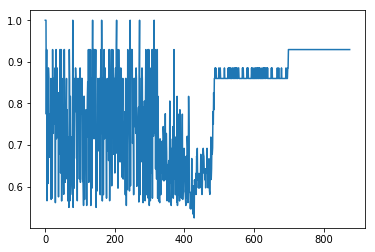

In [62]:
from pylab import figure

fig = figure()
ax = fig.add_subplot(111)
_ = ax.plot(range(len(positional_conservation)), positional_conservation, '-')

## Construcción de Matriz de Distancias

Cunstruiremos la matriz de distancias entre  las secuencias alineadas por métrica de Hamming que es una métrica de disimilitud:

In [63]:
from skbio import DistanceMatrix
from skbio.sequence.distance import hamming

dm = DistanceMatrix.from_iterable(msa, metric=hamming, keys=msa.index)
print(dm)

18x18 distance matrix
IDs:
'A_thaliana_79565543', 'S_cerevisiae_50593115', 'Azoarcus_sp_119896292', ...
Data:
[[ 0.          0.79452055  0.87671233  0.84474886  0.83219178  0.84018265
   0.87328767  0.87557078  0.86986301  0.86757991  0.87100457  0.84703196
   0.84474886  0.86757991  0.86415525  0.86757991  0.84931507  0.86872146]
 [ 0.79452055  0.          0.6826484   0.65296804  0.64611872  0.64383562
   0.67465753  0.66552511  0.66666667  0.66780822  0.66552511  0.66780822
   0.65182648  0.66780822  0.67579909  0.67009132  0.64383562  0.66780822]
 [ 0.87671233  0.6826484   0.          0.31392694  0.30936073  0.31392694
   0.14840183  0.19063927  0.20319635  0.21347032  0.17922374  0.26826484
   0.31164384  0.21347032  0.19863014  0.19292237  0.32191781  0.18150685]
 [ 0.84474886  0.65296804  0.31392694  0.          0.15981735  0.15981735
   0.33675799  0.31278539  0.28310502  0.25684932  0.28881279  0.19634703
   0.01027397  0.25684932  0.30821918  0.29908676  0.15068493  0.27511416

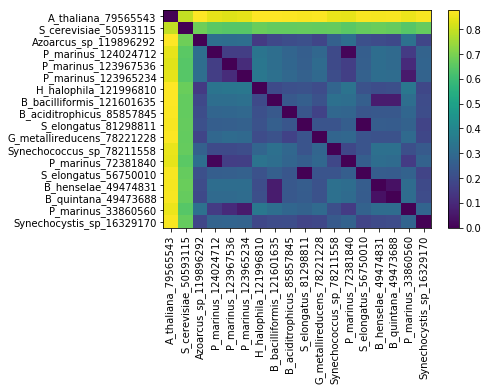

In [64]:
dm

Se puede observar que la distancia entre las 2 primeras secuencias(en este caso son A_Thaliana y S_cerevisiae que es la que nos intersa) con respecto al resto es en promedio muy grande, podemos entonces ver que estas 2 secuencias parecen tener ancestro comunes con el resto.

si analizamos la distribución de S_cerevisiae_50593115 con B_bacilliformis_121601635 por ejemplo podemos constatar esto:

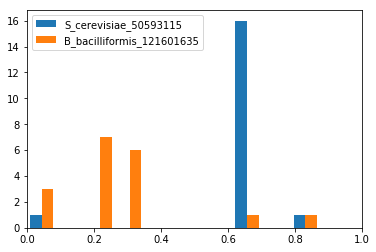

In [65]:
fig = figure()
ax = fig.add_subplot(111)
ax.hist([dm['S_cerevisiae_50593115'], dm['B_bacilliformis_121601635']], label=['S_cerevisiae_50593115', 'B_bacilliformis_121601635'])
ax.set_xlim((0,1))
ax.legend(loc='upper left')

# Construcción de los árboles Filogenéticos método: neighbor joining(nj)

Método neighbor-joining (N J)
Se trata de un método puramente algorítmico , representando una buena aproximación
heurística para encontrar el árbol de evolución mínima más corto. Secuencialmente encuentra vecinos que minimizan la longitud total del árbol
Es muy rápido y proporciona un solo árbol 

http://www.sequentix.de/gelquest/help/neighbor_joining_method.htm

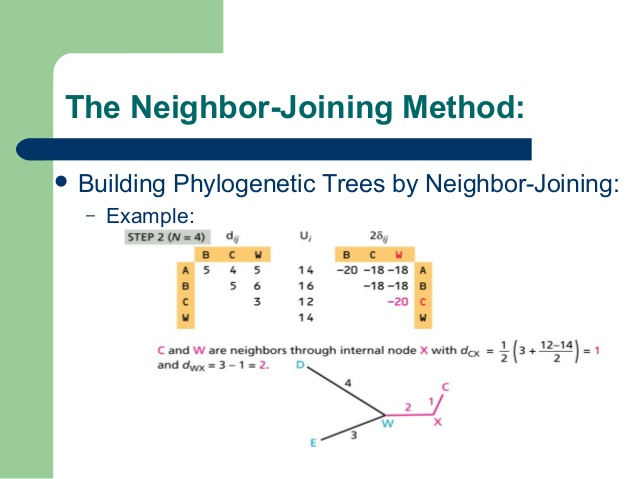

In [77]:
from IPython.display import Image
Image("/home/abraham/Descargas/nj1.jpg") 

Es un caso especial de otro método denominado descomposición de la estrella. Este
método utiliza una matriz de distancias e inicialmente el árbol es una estrella. A
continuación se reconstruye la matriz de distancias. La separación de cada par de nodos
se determina teniendo en cuenta su distancia con respecto al resto de nodos. El árbol se
construye teniendo en cuenta la menor distancia entre dos hojas de acuerdo a la nueva
matriz de distancias.

a partir de la matriz de distancias podemos construir el árbol filogenético con este método:

In [102]:
from skbio.tree import nj
tree = nj(dm)

visualizamos el árbol:

In [82]:
from ete3 import NCBITaxa

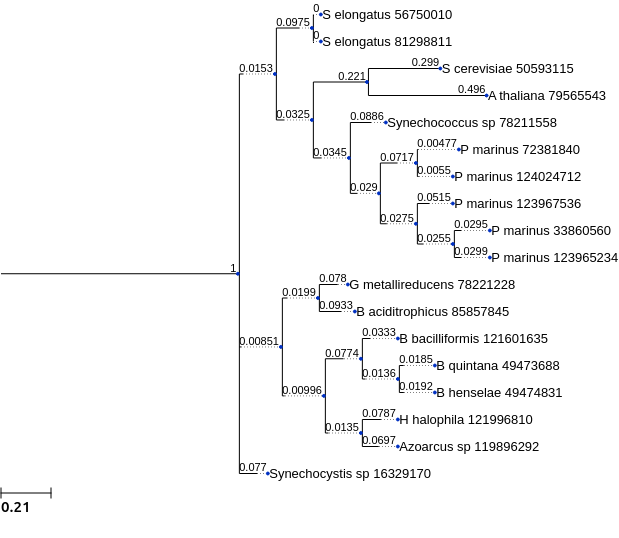

In [98]:
import ete3
#import ete2
from ete3 import Tree, TreeStyle
ts = ete3.TreeStyle()
ts.show_branch_length = True
ete3.TreeNode.from_skbio(tree).render("%%inline", tree_style=ts)

podemos cambiar el nodo raíz hacia la secuencia de interés que en este caso es S cerevisiae para ver su ancestro más reciente y la distancia que tiene con el resto de las secuencias.

Buscando el nuevo nodo:

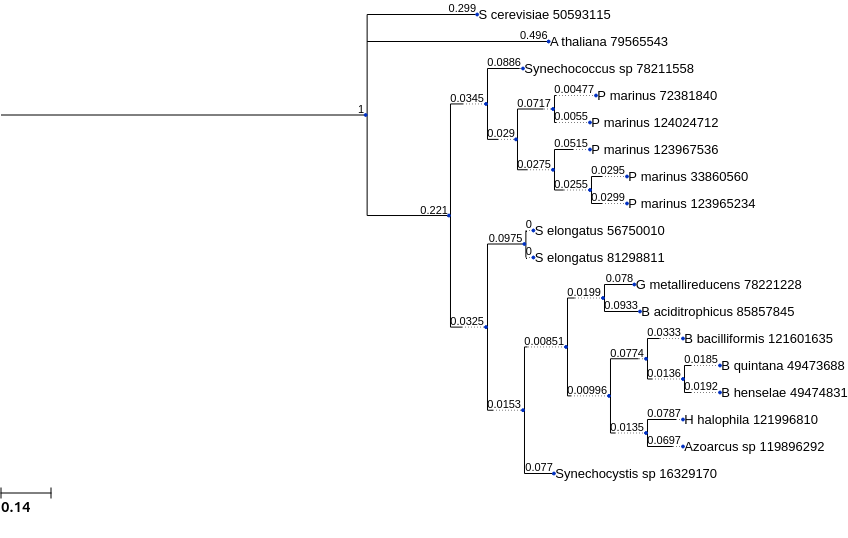

In [94]:
new_root = tree.find("S cerevisiae 50593115").ancestors()[0] 
rooted_tree = tree.root_at(new_root) 
ts = ete3.TreeStyle()
ts.show_branch_length = True
ete3.TreeNode.from_skbio(rooted_tree).render("%%inline", tree_style=ts)

# Construcción de los árboles Filogenéticos método: UPGMA

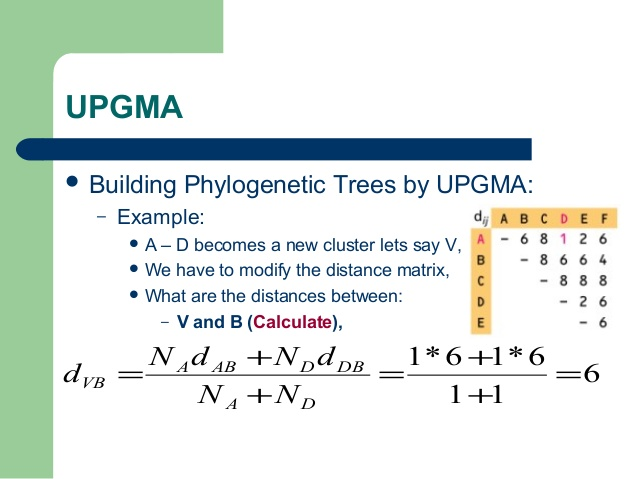

In [84]:
from IPython.display import Image
Image("/home/abraham/Descargas/upgma.jpg") 

Este método asume que las especies son grupos por si mismas, luego relaciona los dos
grupos más cercanos basado en la matriz de distancias, recalcula la matriz de distancia y
repite el proceso hasta que todas las especies estén conectadas a un único grupo. El
método UPGMA realiza todos sus cálculos con la matriz calculada hallando la distancia
genética entre las OTUs.

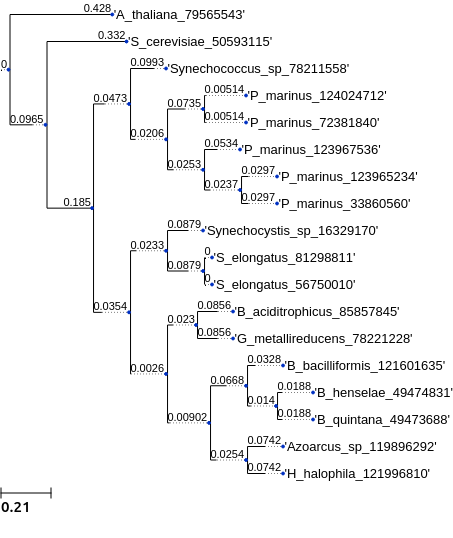

In [89]:
from iab.algorithms import tree_from_distance_matrix
jc_corrected_hamming_tree = tree_from_distance_matrix(dm, metric='upgma')
ete3.Tree(str(jc_corrected_hamming_tree), format=1).render("%%inline", tree_style=ts)

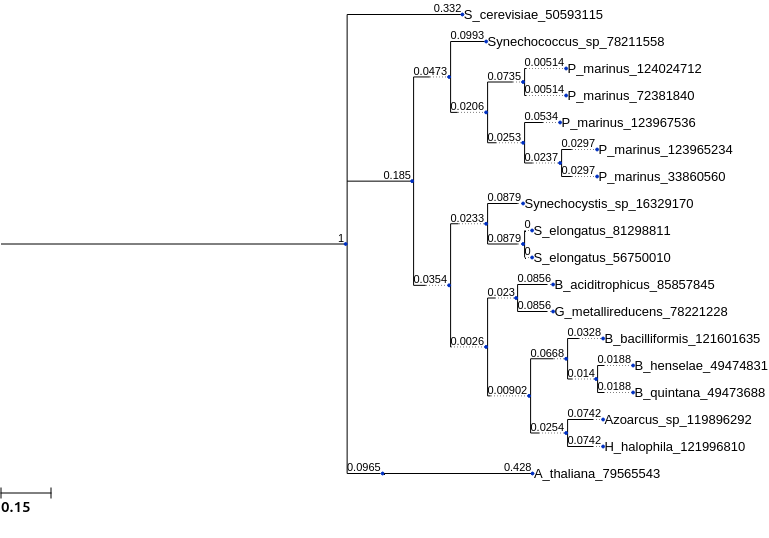

In [96]:
new_root = jc_corrected_hamming_tree.find("S_cerevisiae_50593115").ancestors()[0] 
rooted_tree = jc_corrected_hamming_tree.root_at(new_root) 
ts = ete3.TreeStyle()
ts.show_branch_length = True
ete3.TreeNode.from_skbio(rooted_tree).render("%%inline", tree_style=ts)

Es claro que si comparamos los 2 árboles generados,por los métodos NJ y UPGMA, las distancias son diferentes y esto tiene sentido porque la corrección de las distancias que hace cada método a la matriz de disimilitudes es diferente pero ay que hacer un análisis más proundo para analizar si hay diferencias entre la cercanía de las especies a la levadura de cerveza  en los distintos árboles que a simple vista noes muy claro.

Así continuaremos con el resto de los métodos para seguir obteniendo los distintos árboles, luego el siguiente paso será analizar las diferencias entre los árboles con respecto a que secuencias se encuentran más cercanas y lejanas de S cerevisiae dentro de los distintos árboles, posteriormente determinar cuál es el método que más efectivo y por qué? basado en el análisis del impacto que tienen los distintos métodos en los árboles filogenéticos. 